In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy
import pandas

In [3]:
hist_kw = dict(bins=60, normed=True, alpha=0.5)

# Folding

**TODO**

* Check if folding scheme can improve the quality
* Compare 2-3-..-10 schemes. Does quality become better while a number of folds grows?
* Plot rocs for all models, plot depedence nfolds vs AUC 

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
data = pandas.read_csv('datasets/training.csv')

In [5]:
data.columns

Index([u'id', u'LifeTime', u'dira', u'FlightDistance', u'FlightDistanceError',
       u'IP', u'IPSig', u'VertexChi2', u'pt', u'DOCAone', u'DOCAtwo',
       u'DOCAthree', u'IP_p0p2', u'IP_p1p2', u'isolationa', u'isolationb',
       u'isolationc', u'isolationd', u'isolatione', u'isolationf', u'iso',
       u'CDF1', u'CDF2', u'CDF3', u'ISO_SumBDT', u'p0_IsoBDT', u'p1_IsoBDT',
       u'p2_IsoBDT', u'p0_track_Chi2Dof', u'p1_track_Chi2Dof',
       u'p2_track_Chi2Dof', u'p0_IP', u'p1_IP', u'p2_IP', u'p0_IPSig',
       u'p1_IPSig', u'p2_IPSig', u'p0_pt', u'p1_pt', u'p2_pt', u'p0_p',
       u'p1_p', u'p2_p', u'p0_eta', u'p1_eta', u'p2_eta', u'SPDhits',
       u'production', u'signal', u'mass', u'min_ANNmuon'],
      dtype='object')

In [6]:
variables = list(set(data.columns) - {'id', 'min_ANNmuon', 'mass', 'signal', 'production', 'SPDhits'})

In [7]:
# Divide train on train, test
train_index, test_index = train_test_split(range(len(data)))
train = data.iloc[train_index, :]
test = data.iloc[test_index, :]

### FoldingClassifier in sklearn-style from rep

In [8]:
from rep.metaml import FoldingClassifier
from sklearn.ensemble import GradientBoostingClassifier

base_gb = GradientBoostingClassifier(max_depth=6, learning_rate=0.01, n_estimators=200, 
                                     min_samples_leaf=50, max_features=8, subsample=0.7)
folding_example = FoldingClassifier(base_gb, features=variables, n_folds=3)
folding_example.fit(train, train.signal.values)

Couldn't import dot_parser, loading of dot files will not be possible.


FoldingClassifier(base_estimator=GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=8, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=0.7, verbose=0,
              warm_start=False),
         features=['FlightDistanceError', 'IP', 'CDF1', 'p2_IPSig', 'p0_IP', 'DOCAone', 'p0_IPSig', 'DOCAtwo', 'p0_eta', 'p0_track_Chi2Dof', 'LifeTime', 'IPSig', 'p2_pt', 'FlightDistance', 'p0_IsoBDT', 'pt', 'p2_IsoBDT', 'p1_track_Chi2Dof', 'isolationc', 'p1_pt', 'p1_p', 'DOCAthree', 'IP_p1p2', 'isolationb',..._IP', 'VertexChi2', 'p2_track_Chi2Dof', 'p1_IsoBDT', 'p2_eta', 'p1_eta', 'p2_IP', 'iso', 'p1_IPSig'],
         ipc_profile=None, n_folds=3, random_state=None)

In [9]:
from collections import OrderedDict

folding_all = OrderedDict()

base_gb = GradientBoostingClassifier(max_depth=6, learning_rate=0.01, n_estimators=200, 
                                     min_samples_leaf=50, max_features=8, subsample=0.7)

# train different folding schemes
for folds in range(2, 11):
    temp = FoldingClassifier(base_gb, features=variables, n_folds=folds)
    temp.fit(train, train.signal.values)
    folding_all['folds {}'.format(folds)] = temp

### report on the training sample (predict data fold by that classifier which was trained without this fold)

In [10]:
# Use rep.report to plot rocs by a simple way 
from rep.report import ClassificationReport
from rep.data import LabeledDataStorage
lds = LabeledDataStorage(train, train.signal)
# create report for different classifiers
report = ClassificationReport(folding_all, lds)

KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column


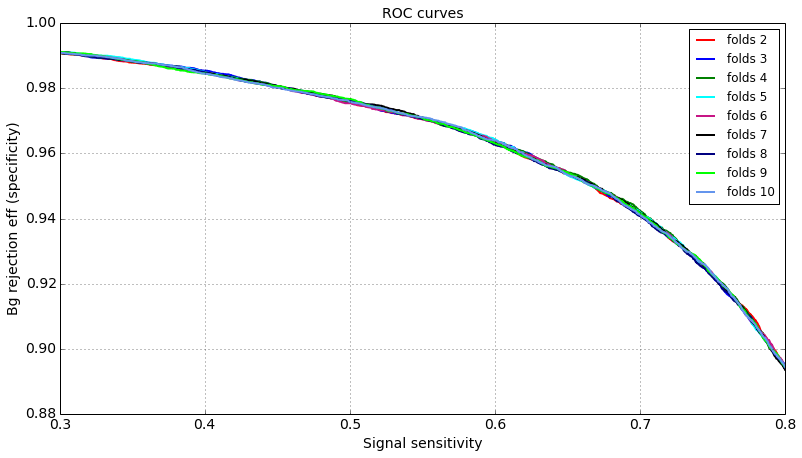

In [11]:
# plot roc curve for all models
report.roc().plot(new_plot=True, xlim=(0.3, 0.8), ylim=(0.88, 1.))

In [12]:
# import from rep ROC auc score 
from rep.report.metrics import RocAuc
aucs = report.compute_metric(RocAuc())

In [13]:
print aucs

OrderedDict([('folds 2', 0.92683090452489958), ('folds 3', 0.92710700087825115), ('folds 4', 0.92738808347356472), ('folds 5', 0.92737356575271312), ('folds 6', 0.92727274375889679), ('folds 7', 0.92721120006388724), ('folds 8', 0.92700961625077327), ('folds 9', 0.92710365336153655), ('folds 10', 0.92710443398166176)])


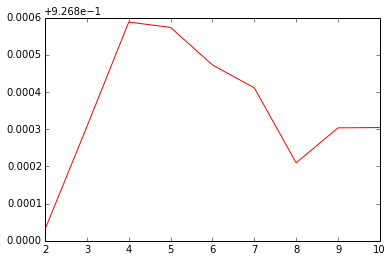

In [14]:
plot(range(2, 11), aucs.values())

### report on the test sample (take an average of all classifiers)

In [15]:
lds = LabeledDataStorage(test, test.signal)
report = ClassificationReport(folding_all, lds)

KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)
KFold prediction using random classifier (length of data passed not equal to length of train)


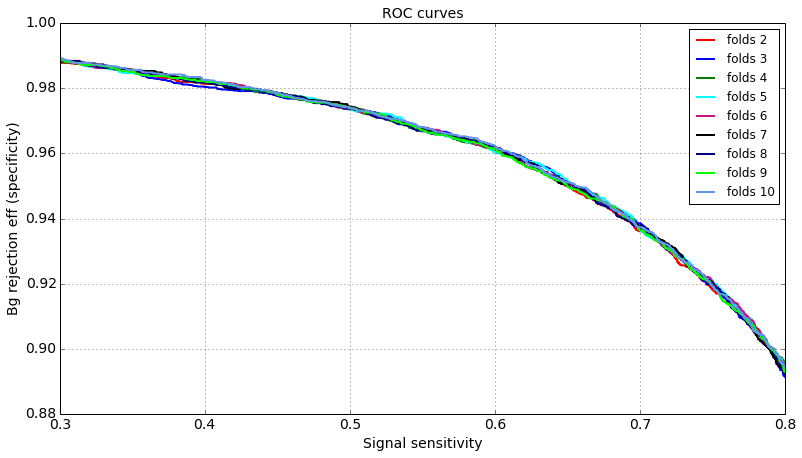

In [16]:
report.roc().plot(new_plot=True, xlim=(0.3, 0.8), ylim=(0.88, 1.))

OrderedDict([('folds 2', 0.92380984018395196), ('folds 3', 0.92413340224363849), ('folds 4', 0.92423802084067097), ('folds 5', 0.924462629382929), ('folds 6', 0.92427416167573662), ('folds 7', 0.92424453864822609), ('folds 8', 0.92408280210853655), ('folds 9', 0.92411941009021858), ('folds 10', 0.9241629956110462)])


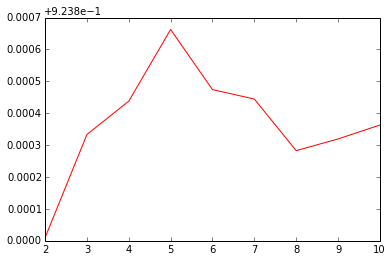

In [17]:
aucs = report.compute_metric(RocAuc())
print aucs
plot(range(2, 11), aucs.values())

**Note** In this case we don't need to split into train-test, and can train on the whole data because of folding scheme!

---------

# Blending 
(hierarchy training using the source of the $\tau\to\mu\mu\mu$ decay)

Check on different models if this hierarchy training over a model works better than the model itself.

#### simple training

In [18]:
simple_gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, min_samples_leaf=50, 
                                       subsample=0.5, 
                                       max_features=8, max_depth=6)
simple_gb.fit(train[variables], train.signal.values)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=8, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [19]:
simple_probs = simple_gb.predict_proba(test[variables])[:, 1]

#### blending training

In [20]:
# Divide train into two stage for hierarchy training
train_index1, train_index2 = train_test_split(range(len(train)))
train1 = train.iloc[train_index1, :]
train2 = train.iloc[train_index2, :]

In [21]:
# prepare data for each tau source
production_data = []
bck = train1[train1.signal == 0]
productions = {1, 2, 4, 5, 6}
for production in productions:
    production_data.append(train1[(train1.signal == 1) & (train1.production == production)])

In [22]:
# train models for each tau source
models = []
for index, production in enumerate(productions):
    model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, min_samples_leaf=50, 
                                       subsample=0.5, max_features=8, max_depth=6)
    temp = pandas.concat([production_data[index], bck])
    model.fit(temp[variables], temp.signal.values)
    models.append(model)

In [23]:
# predict second stage data and test data by all models 
# add new predictions-features to the variables
variables_blending = variables[:]
for index, model in enumerate(models):
    train2['new_{}'.format(index)] = model.predict_proba(train2[variables])[:, 1]
    test['new_{}'.format(index)] = model.predict_proba(test[variables])[:, 1]
    variables_blending.append('new_{}'.format(index))

/Users/antares/.virtualenvs/test/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/antares/.virtualenvs/test/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
# train resulting model using old features and new features
blending_gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, min_samples_leaf=50, 
                                         subsample=0.5, 
                                         max_features=8, max_depth=6)
blending_gb.fit(train2[variables_blending], train2.signal.values)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=8, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [25]:
blending_probs = blending_gb.predict_proba(test[variables_blending])[:, 1]

In [26]:
fpr_blend, tpr_blend, _ = roc_curve(test.signal.values, blending_probs)
fpr_simple, tpr_simple, _ = roc_curve(test.signal.values, simple_probs)

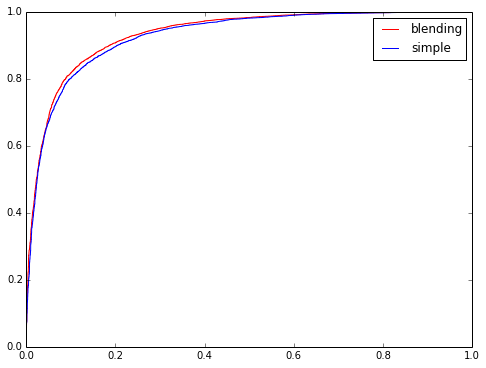

In [27]:
# compare rocs for two schemes
figsize(8, 6) 
plot(fpr_blend, tpr_blend, label='blending')
plot(fpr_simple, tpr_simple, label='simple')
legend()

In [28]:
print 'Blending', roc_auc_score(test.signal.values, blending_probs)
print 'Simple', roc_auc_score(test.signal.values, simple_probs)

Blending 0.934088719299
Simple 0.928321067645


**Result:**
Such hierarchy gives the significant improvement

---------

# Calibrate classifier's output to probabilities 

* Platt regression (logistic regression)
* isotonic regression (monotonic function, optimizes $\sum w_i (y_i - \hat{y}_i)^2$)

Nice comment about output calibration using two methods http://fastml.com/classifier-calibration-with-platts-scaling-and-isotonic-regression/

In [29]:
# divide test into two parts: 
#    the first to calibrate output of the classifer,
#    the second test the quality of the calibration
test_index1, test_index2 = train_test_split(range(len(test)))
test1 = test.iloc[test_index1, :]
test2 = test.iloc[test_index2, :]

### Isotonic regression

In [49]:
from sklearn.isotonic import IsotonicRegression
iso_calib = IsotonicRegression(out_of_bounds='clip')
iso_calib.fit(blending_probs[test_index1], test1.signal.values)

IsotonicRegression(increasing=True, out_of_bounds='clip', y_max=None,
          y_min=None)

In [50]:
iso_probs = iso_calib.predict(blending_probs[test_index2])

####compare histograms for the calibrated output and the initial output

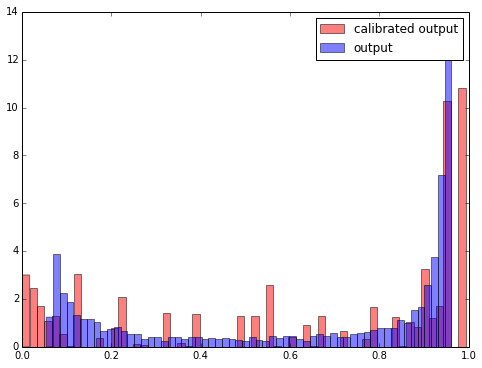

In [51]:
hist(iso_probs, label='calibrated output', **hist_kw)
hist(blending_probs[test_index2], label='output', **hist_kw)
legend()

#### Compare isotonic calibrated probabilities and estimated probabilities using bins
* Plot isotonic calibrated output for [0, 1]
* Divide output into several bins, for each bin compute $s_i / (s_i + b_i)$ - estimated probability in bin to be a signal event


In [52]:
def plot_probs(temp_probs, name, bins_cal=20):
    bins = linspace(0, 1, bins_cal)
    bins_center = bins[:-1] + (bins[1:] - bins[:-1]) / 2.
    bins_index = numpy.searchsorted(bins[1:-1], temp_probs)
    sig_probs = numpy.bincount(bins_index, weights=test2.signal.values)
    bck_probs = numpy.bincount(bins_index, weights=1-test2.signal.values)
    plot(bins_center, 1. * sig_probs / (sig_probs + bck_probs), label=name)
    plot([0, 1], [0, 1], label='ideal')

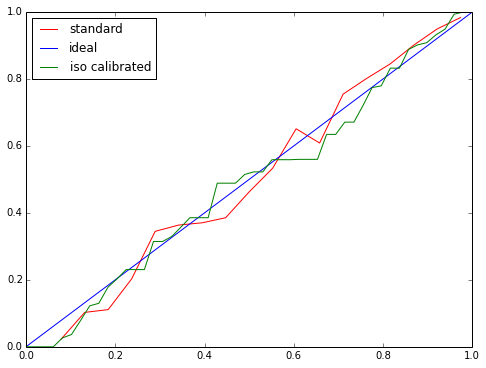

In [53]:
plot_probs(blending_probs[test_index2], 'standard')
plot(numpy.linspace(0, 1, 50), iso_calib.predict(numpy.linspace(0, 1, 50)), label='iso calibrated')
legend(loc='best')

### Platt regression

In [54]:
from sklearn.linear_model import LogisticRegression
from scipy.special import logit
platt_calib = LogisticRegression(C=100) 
# transform output from [0, 1] to [-infty, infty] to train Logistic Regression, because of its loss function expression
platt_calib.fit(logit(blending_probs[test_index1]).reshape(-1, 1), test1.signal.values)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [55]:
platt_probs = platt_calib.predict_proba(logit(blending_probs[test_index2]).reshape(-1, 1))[:, 1]

####compare histograms for the calibrated output and the initial output

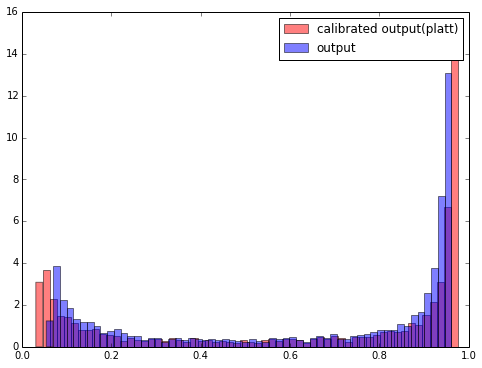

In [56]:
hist(platt_probs, label='calibrated output(platt)', **hist_kw)
hist(blending_probs[test_index2], label='output', **hist_kw)
legend()

#### Compare Platt calibrated probabilities and estimated probabilities using bins
* Plot Platt calibrated output for [0, 1]
* Divide output into several bins, for each bin compute $s_i / (s_i + b_i)$ - estimated probability in bin to be a signal event

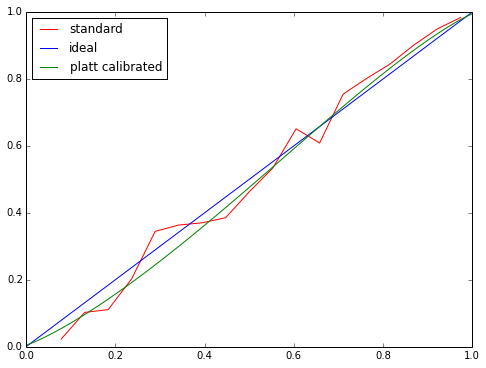

In [57]:
plot_probs(blending_probs[test_index2], 'standard')
plot(numpy.linspace(0, 1, 50), platt_calib.predict_proba(logit(numpy.linspace(0.01, 0.99, 50)).reshape(-1, 1))[:, 1], 
     label='platt calibrated')
legend(loc='best')

#### Compute AUC, logloss, MSE for initial and calibrated values. How do metrics vary after the calibration?

In [58]:
from sklearn.metrics import log_loss, mean_squared_error

def compute_metrics_for_calibration(probs_initial, probs, name):
    print 'Initial', 'AUC:', roc_auc_score(test2.signal, probs_initial)
    print 'Initial', 'Log loss:', log_loss(test2.signal, probs_initial)
    print 'Initial', 'MSE:', mean_squared_error(test2.signal, probs_initial)
    print name, 'AUC:', roc_auc_score(test2.signal, probs)
    print name, 'Log loss:', log_loss(test2.signal, probs)
    print name, 'MSE:', mean_squared_error(test2.signal, probs)

#### Metrics for isotonic method

In [59]:
compute_metrics_for_calibration(blending_probs[test_index2], iso_probs, 'Isotonic')

Initial AUC: 0.938801174282
Initial Log loss: 0.307720469657
Initial MSE: 0.090916588911
Isotonic AUC: 0.938710954232
Isotonic Log loss: 0.300389517698
Isotonic MSE: 0.0905911511759


#### Metrics for Platt method

In [60]:
compute_metrics_for_calibration(blending_probs[test_index2], platt_probs, 'Platt')

Initial AUC: 0.938801174282
Initial Log loss: 0.307720469657
Initial MSE: 0.090916588911
Platt AUC: 0.938801174282
Platt Log loss: 0.301355211267
Platt MSE: 0.0901253816389


#### Log loss and MSE become lower (better), and AUC also become lower (worse) (for the Platt AUC will the same)

--------

#Hypotheses metrics

Train any model on training data and compare different metrics on the test data:

* $\frac{s} {\sqrt{(s + b)}}$
* $\frac{s} {\sqrt{(10 + b)}}$
* $\frac{s} {\sqrt{(0.1 + b)}}$
* $\frac{s} {(2.5 + \sqrt{b})}$ - Punzi metric

#U-test

Use U-test to compare different ND pdfs

In [61]:
data_agreement = pandas.read_csv('datasets/check_agreement.csv')
data_MC = pandas.concat([data_agreement[data_agreement.signal == 1], data[data.signal == 1]])
data_MC['signal'] = numpy.array([0] * sum(data_agreement.signal.values == 1) + [1] * sum(data.signal.values == 1))

In [62]:
agreement_features = ['LifeTime', 'VertexChi2', 'DOCAtwo']
disagreement_features = ['dira', 'IP', 'IPSig', 'IP_p0p2', 'IP_p1p2', 'isolationb']

In [63]:
# Divide train on train, test
train_MC_index, test_MC_index = train_test_split(range(len(data_MC)))
train_MC = data_MC.iloc[train_MC_index, :]
test_MC = data_MC.iloc[test_MC_index, :]

## U-test function

code the U-statistic and compute number of sigmas: $\frac{U - \mathbb{E}U}{\sqrt{\mathbb{V}U}}$

In [64]:
def u_test_compute(labels, probs):
    # should return number of sigmas
    indices = numpy.argsort(probs)
    rank = numpy.arange(1, len(probs) + 1)
    rank_sig = rank[labels[indices] == 1]
    rank_bck = rank[labels[indices] == 0]
    count_rank = len(rank_sig)
    result_rank = numpy.sum(rank_sig)
    u_test = result_rank - count_rank * (count_rank + 1) / 2.
    u_mean = len(rank_sig) * len(rank_bck) / 2.
    u_var = len(rank_sig) * len(rank_bck) / 12. * (len(rank_sig) + len(rank_bck) + 1)
    return (u_test - u_mean) / sqrt(u_var)

## Train the calssifier to distinguish two ND pdfs

### Train model on the agreement features

In [65]:
gb_disagree = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, min_samples_leaf=50, subsample=0.5, 
                                max_depth=6)
gb_disagree.fit(train_MC[disagreement_features], train_MC.signal.values)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

### Train model on the disagreement features

In [66]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, min_samples_leaf=50, subsample=0.5, 
                                max_depth=6)
gb.fit(train_MC[agreement_features], train_MC.signal.values)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [67]:
probs_disagree = gb_disagree.predict_proba(test_MC[disagreement_features])[:, 1]
probs_agree = gb.predict_proba(test_MC[agreement_features])[:, 1]

In [68]:
# Compute AUC and U-test sigmas
print 'AUC', roc_auc_score(test_MC.signal.values, probs_disagree)
print 'U-test, sigmas', u_test_compute(test_MC.signal.values, probs_disagree) 
print 'AUC', roc_auc_score(test_MC.signal.values, probs_agree)
print 'U-test, sigmas', u_test_compute(test_MC.signal.values, probs_agree) 

AUC 0.796970373406
U-test, sigmas 42.7750559218
AUC 0.535302224763
U-test, sigmas 5.08488003964


#### What we can say about the similarity of two ND pdfs for both examples?

For the disagreement feature U-test says that pdfs are very-very different. And for the second case we also have different pdfs, but they are similarer.
